# Arrest Data Metric

For my individual metric, I analyzed the Pittsburgh Police Arrest dataset from the WPRDC.  
- My goal was to measure “safety” across Pittsburgh neighborhoods by looking at how many arrests happened in each neighborhood.  

- A lower number of arrests suggests a safer neighborhood, and a higher number suggests less safety. Pretty self explanatory.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")
df.head()


,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [8]:
df.columns


Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

## Cleaning some of the data up

Some rows are missing a neighborhood value.  
I removed rows where `INCIDENTNEIGHBORHOOD` was blank or NaN so that the analysis would only include valid neighborhoods.


In [9]:
df = df.dropna(subset=["INCIDENTNEIGHBORHOOD"])


## Counting Arrests by Neighborhood



In [10]:
counts = df["INCIDhoods by the number of arrests.ENTNEIGHBORHOOD"].value_counts()
counts.head()


INCIDENTNEIGHBORHOOD
Central Business District    4440
South Side Flats             3497
Carrick                      2352
East Allegheny               2217
Homewood South               2090
Name: count, dtype: int64

## Sorting Neighborhoods from Safest to Least Safe

For this metric, fewer arrests = safer neighborhood.  



In [11]:
safest = counts.sort_values(ascending=True)
safest.head(10)


INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood     2
Troy Hill-Herrs Island      6
Mt. Oliver Boro            18
Central Northside          23
Ridgemont                  37
Regent Square              37
New Homestead              39
Swisshelm Park             43
Chartiers City             46
East Carnegie              48
Name: count, dtype: int64

## Visualization of Arrest Counts

This bar chart shows the number of arrests in each Pittsburgh neighborhood.  
This helps compare neighborhoods visually.


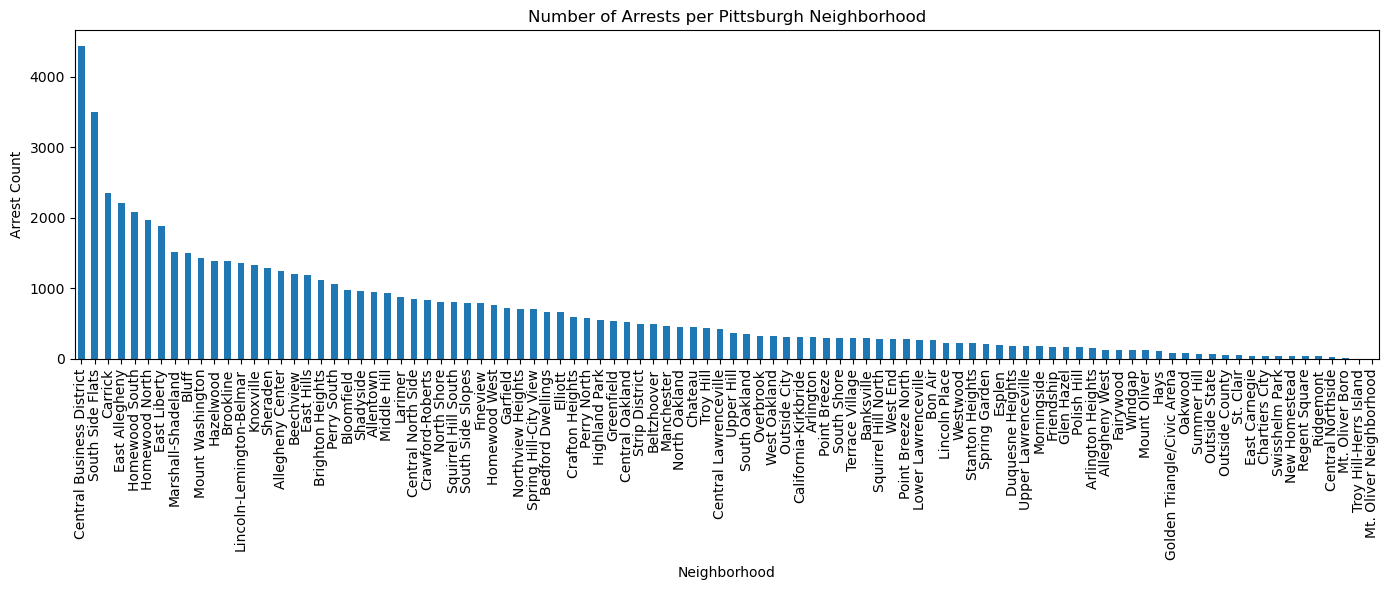

In [12]:
plt.figure(figsize=(14,6))
counts.sort_values(ascending=False).plot(kind="bar")
plt.title("Number of Arrests per Pittsburgh Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Count")
plt.tight_layout()
plt.show()


## Conclusion

Using arrest counts as a safety metric, neighborhoods with fewer arrests appear safer.  
Some neighborhoods have consistently low arrest numbers, while others have much higher amounts.

This metric is only one way to measure safety, and it does not represent all kinds of incidents or community factors.  
However, it provides a simple, data-driven way to compare neighborhoods using information from the Pittsburgh Police Arrests dataset.

I will contribute this metric to my group so we can combine it with the other metrics and determine the overall best neighborhood in Pittsburgh.
